In [1]:
import fastai.tabular.all as ft
import pandas as pd
import fastai.vision.all as fv
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
!ls storage/prediccion\ covid/
!pip install seaborn

diabetes.csv  latestdata.csv


In [3]:
df=pd.read_csv('storage/prediccion covid/latestdata.csv',low_memory=False,parse_dates=['date_death_or_discharge'])
df.drop(['ID','date_onset_symptoms','date_admission_hospital','date_confirmation','travel_history_dates','notes_for_discussion','additional_information','source'],axis=1,inplace=True)
df

,age,sex,city,province,country,latitude,longitude,geo_resolution,symptoms,lives_in_Wuhan,...,outcome,date_death_or_discharge,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,NaN,...,"critical condition, intubated as of 14.02.2020",NaT,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,NaN,...,death,2020-02-22,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,discharge,2020-02-17,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,NaN,...,NaN,NaT,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,NaN,...,NaN,NaT,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,point,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,Peru,14429.0,NaN,False
2676307,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,point,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,Peru,14695.0,NaN,False
2676308,52,female,Comas,Lima,Peru,-11.932980,-77.040850,point,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,Peru,14400.0,NaN,False
2676309,52,male,Callao,Callao,Peru,-12.000740,-77.118240,point,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,Peru,14516.0,NaN,False


In [4]:
df['outcome'].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'died', 'Death', 'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Critical condition', 'Receiving Treatment',
       'severe illness', 'unstable', 'critical condition', 'Hospitalized',
       'Migrated', 'Migrated_Other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

In [5]:
df.loc[df.outcome=='critical condition, intubated as of 14.02.2020','outcome']='critical'
df.loc[df.outcome=='death','outcome']='dead'
df.loc[df.outcome=='discharge','outcome']='discharged'
df.loc[df.outcome=='discharged','outcome']='discharged'
df.loc[df.outcome=='Discharged','outcome']='discharged'
df.loc[df.outcome=='Discharged from hospital','outcome']='discharged'
df.loc[df.outcome=='not hospitalized','outcome']='not hospitalized'
df.loc[df.outcome=='recovered','outcome']='recovered'
df.loc[df.outcome=='recovering at home 03.03.2020','outcome']='recovered'
df.loc[df.outcome=='released from quarantine','outcome']='recovered'
df.loc[df.outcome=='severe','outcome']='critical'
df.loc[df.outcome=='stable condition','outcome']='stable'
df.loc[df.outcome=='died','outcome']='dead'
df.loc[df.outcome=='Death','outcome']='dead'
df.loc[df.outcome=='Symptoms only improved with cough. Currently hospitalized for follow-up.','outcome']='hospitalized'
df.loc[df.outcome=='treated in an intensive care unit (14.02.2020)','outcome']='critical'
df.loc[df.outcome=='Alive','outcome']='recovered'
df.loc[df.outcome=='Dead','outcome']='dead'
df.loc[df.outcome=='Recovered','outcome']='recovered'
df.loc[df.outcome=='Stable','outcome']='stable'
df.loc[df.outcome=='Died','outcome']='dead'
df.loc[df.outcome=='Deceased','outcome']='dead'
df.loc[df.outcome=='Under treatment','outcome']='stable'
df.loc[df.outcome=='Critical condition','outcome']='critical'
df.loc[df.outcome=='Receiving Treatment','outcome']='recovered'
df.loc[df.outcome=='severe illness','outcome']='critical'
df.loc[df.outcome=='unstable','outcome']='critical'
df.loc[df.outcome=='critical condition','outcome']='critical'
df.loc[df.outcome=='Hospitalized','outcome']='hospitalized'
df.loc[df.outcome=='Migrated','outcome']='hospitalized'
df.loc[df.outcome=='Migrated_Other','outcome']='hospitalized'
df.loc[df.outcome=='https://www.mspbs.gov.py/covid-19.php','outcome']=np.nan


In [6]:
df = df.dropna(subset=["outcome"])

In [7]:
df['outcome'].unique()

array(['critical', 'dead', 'discharged', 'not hospitalized', 'recovered',
       'stable', 'hospitalized'], dtype=object)

In [8]:
cat_names=['age','sex', 'city', 'province', 'country', 'date_death_or_discharge','lives_in_Wuhan',
       'geo_resolution', 'symptoms', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'sequence_available', 'location', 'admin3', 'admin2',
       'admin1', 'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary']

cont_names=['latitude', 'longitude']

y_names=['outcome']

In [9]:
len(df)

307256

In [10]:
X=list(range(len(df)))

In [11]:
valid_cut=len(df)-57382

In [12]:
src=ft.TabularPandas(df,
                    procs=[ft.Categorify,ft.FillMissing],
                    cat_names=cat_names, cont_names=cont_names,y_names=y_names,y_block = ft.CategoryBlock,
                    splits=(X[:valid_cut],X[valid_cut:]))

In [13]:
dls=src.dataloaders(bs=50000)

In [14]:
batch=dls.one_batch()
cat,cot,y=batch

In [15]:
y.shape

torch.Size([50000, 1])

In [16]:
learn=ft.tabular_learner(dls,opt_func=ft.ranger,metrics=ft.accuracy)

In [17]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(132, 25)
    (1): Embedding(3, 3)
    (2): Embedding(2351, 124)
    (3): Embedding(214, 32)
    (4): Embedding(52, 15)
    (5): Embedding(116, 23)
    (6): Embedding(3, 3)
    (7): Embedding(6, 4)
    (8): Embedding(116, 23)
    (9): Embedding(150, 26)
    (10): Embedding(4, 3)
    (11): Embedding(3, 3)
    (12): Embedding(67, 17)
    (13): Embedding(4, 3)
    (14): Embedding(66, 17)
    (15): Embedding(12, 6)
    (16): Embedding(68, 17)
    (17): Embedding(98, 21)
    (18): Embedding(49, 14)
    (19): Embedding(1379, 92)
    (20): Embedding(4, 3)
    (21): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(479, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=479, out_features=200, bias=False)
      (2): ReLU(inplac

SuggestedLRs(lr_min=0.09120108485221863, lr_steep=0.010964781977236271)

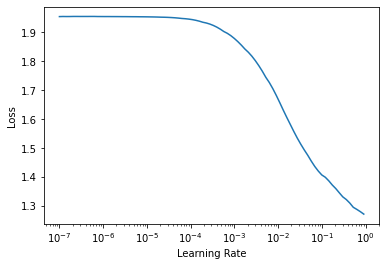

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(30,0.07)

epoch,train_loss,valid_loss,accuracy,time
0,1.893966,1.841463,0.793193,00:00
1,1.803434,1.854109,0.793193,00:00
2,1.596320,1.803960,0.793193,00:00
3,1.394118,1.413122,0.499094,00:00
4,1.225734,1.141755,0.506134,00:00
5,1.110629,1.038763,0.493848,00:00
6,1.029934,0.888173,0.369907,00:00
7,0.970779,0.803271,0.816266,00:00
8,0.921326,0.796983,0.812014,00:00
9,0.880828,0.739733,0.814297,00:00


# Prediccion

In [30]:
cat, tensor, probs = learn.predict(df.iloc[17382])
probs

tensor([1.9162e-05, 1.6533e-02, 1.6309e-05, 7.0226e-01, 2.0295e-05, 2.8114e-01,
        1.7285e-05])

In [31]:
from sklearn.preprocessing import OneHotEncoder

drop_enc = OneHotEncoder().fit(df[['outcome']])

In [32]:
aux=np.array([0 for i in range(len(probs))])
aux[list(probs).index(max(probs))]=1
aux

array([0, 0, 0, 1, 0, 0, 0])

In [33]:
drop_enc.inverse_transform([aux])

array([['hospitalized']], dtype=object)

In [34]:
df.iloc[17382]['outcome']

'hospitalized'